In [1]:

%matplotlib inline


In [2]:
%pip install numpy matplotlib seaborn pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np                   # For numerical operations and handling arrays
import matplotlib.pyplot as plt       # For plotting graphs and images
import seaborn as sns                 # For statistical visualization
from PIL import Image                 # For opening and manipulating the images


In [4]:
def rgb2gray(rgb):
    """
    Converts an RGB image to grayscale using weighted sum method.
    Formula: 0.2989*R + 0.5870*G + 0.1140*B
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)


In [5]:

# --- Function: Compute Local Binary Pattern (LBP) ---
def lbp(image):
    """
    Computes the Local Binary Pattern (LBP) of a grayscale image.
    """
    height, width = image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)
    
    # Offsets for 8 neighboring pixels
    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1)]

    # Iterate through each pixel (excluding the border)
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            center = image[y, x]
            binary_string = ''
            # Compare center pixel with each neighbor
            for dy, dx in offsets:
                neighbor = image[y + dy, x + dx]
                binary_string += '1' if neighbor >= center else '0'
            # Convert binary string to integer
            lbp_value = int(binary_string, 2)
            lbp_image[y, x] = lbp_value

    return lbp_image

In [6]:
# --- Load a Sample Image ---
image_path = "image.jpg"  # Replace with your actual image path
img = Image.open(image_path)
img = np.asarray(img)

In [7]:
# --- Convert to Grayscale ---
gray_image = rgb2gray(img)

In [8]:
# --- Apply LBP to the Grayscale Image ---
lbp_image = lbp(gray_image)

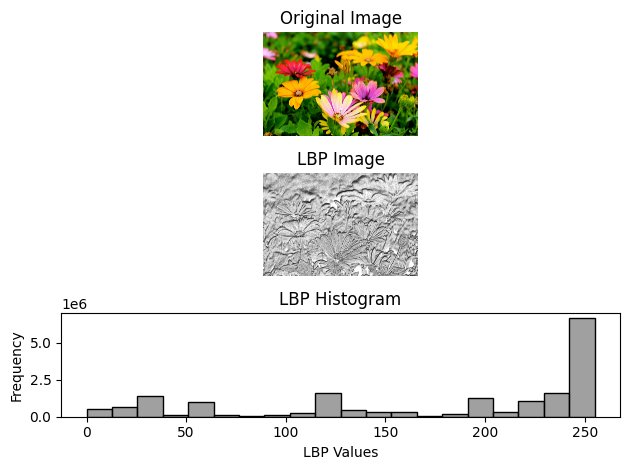

In [9]:
# 1. Original Image
plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

# 2. LBP Image
plt.subplot(3, 1, 2)
plt.title('LBP Image')
plt.imshow(lbp_image, cmap='gray')
plt.axis('off')

# 3. LBP Histogram
plt.subplot(3, 1, 3)
plt.title('LBP Histogram')
sns.histplot(lbp_image.reshape(-1), bins=20, kde=False, color='gray')
plt.xlabel('LBP Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()